In [7]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
def parser(time_data):
    return pd.datetime.strptime('2017-'+time_data,'%Y-%d-%m %H:%M:%S')
#     return pd.to_datetime(time_data)
data = pd.read_csv('../data/cm_monitor.csv',index_col=0, parse_dates=[0], date_parser=parser)
# 去掉前10个点
dataset = data.used[10:]
# dataset = dataframe.values
dataset = dataset.astype('float32')


In [8]:
# normalize the dataset
scaler = preprocessing.MinMaxScaler()
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))

In [22]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=10, verbose=2)


Epoch 1/20
3s - loss: 0.0309
Epoch 2/20
1s - loss: 4.6684e-04
Epoch 3/20
1s - loss: 3.9375e-04
Epoch 4/20
1s - loss: 3.4897e-04
Epoch 5/20
1s - loss: 3.0916e-04
Epoch 6/20
1s - loss: 2.7615e-04
Epoch 7/20
1s - loss: 2.4168e-04
Epoch 8/20
1s - loss: 2.0732e-04
Epoch 9/20
1s - loss: 1.7211e-04
Epoch 10/20
1s - loss: 1.5381e-04
Epoch 11/20
1s - loss: 1.4411e-04
Epoch 12/20
1s - loss: 1.3319e-04
Epoch 13/20
1s - loss: 1.3872e-04
Epoch 14/20
1s - loss: 1.2949e-04
Epoch 15/20
1s - loss: 1.3719e-04
Epoch 16/20
1s - loss: 1.3517e-04
Epoch 17/20
1s - loss: 1.4395e-04
Epoch 18/20
1s - loss: 1.4840e-04
Epoch 19/20
1s - loss: 1.2974e-04
Epoch 20/20
1s - loss: 1.4179e-04


In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 14644397.76 RMSE
Test Score: 22395884.09 RMSE


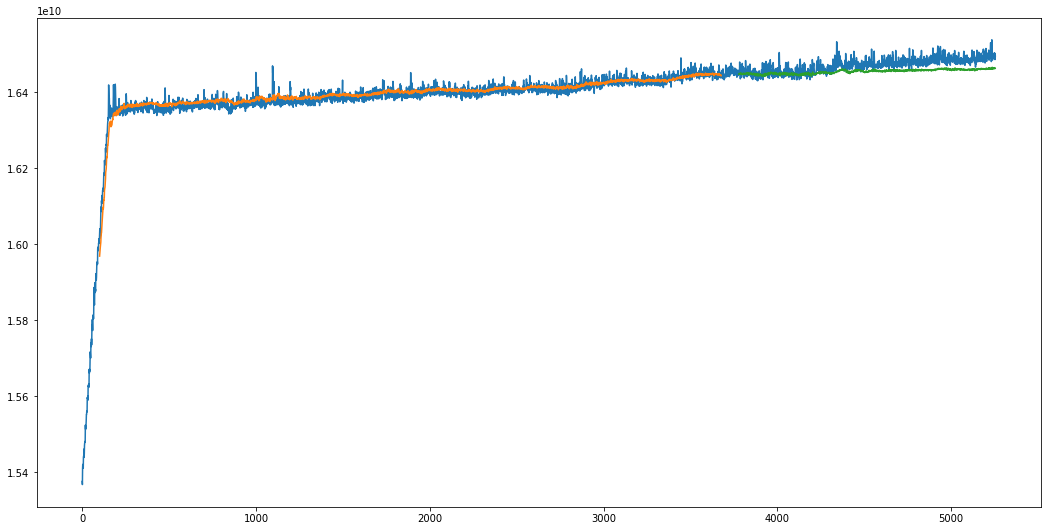

In [24]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gcf().set_size_inches(18,9)
plt.show()

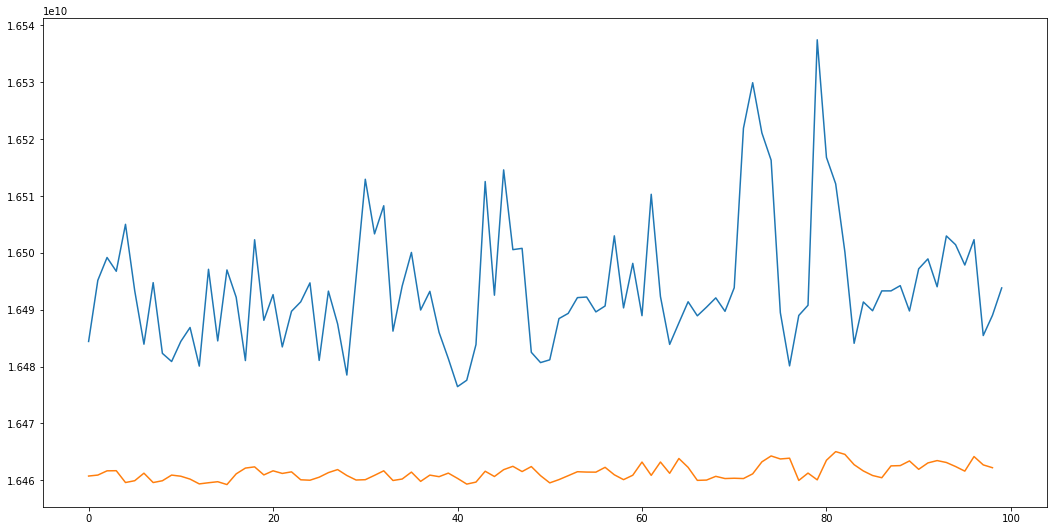

In [25]:
data = scaler.inverse_transform(dataset)
plt.plot(data[-100:])
plt.plot(testPredictPlot[-100:])
plt.gcf().set_size_inches(18,9)
plt.show()

In [21]:
testPredictPlot.shape

(5255, 1)